# Metallic Radii Analysis of Rare Earth Elements

This notebook provides an interactive analysis of metallic radii calculated from CIF files of rare earth elements.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [29]:
# Load the results
df = pd.read_csv('output/metallic_radii_results.csv')
summary_df = pd.read_csv('output/metallic_radii_summary.csv')

print(f"Loaded data for {len(df)} elements")
df.head()

Loaded data for 15 elements


,Element,Crystal System,Space Group,a (Å),b (Å),c (Å),Volume (Å³),Z,Density (g/cm³),Metallic Radius (Å),Atomic Volume (Å³),Coordination Number,Filename
0,Ce,fcc,F m -3 m,5.1612,5.1612,5.1612,137.48,4,6.77,1.824760,34.37,12,Ce_(fcc)_EntryWithCollCode292023.cif
1,Dy,hcp,P 63/m m c,3.5903,3.5903,5.6475,63.04,2,8.56,1.795150,31.52,12,Dy_(hcp)_EntryWithCollCode53357.cif
2,Er,hcp,P 63/m m c,3.5588,3.5588,5.5874,61.28,2,9.06,1.779400,30.64,12,Er_(hcp)_EntryWithCollCode53387.cif
3,Eu,bcc,I m -3 m,4.5824,4.5824,4.5824,96.22,2,5.24,1.984237,48.11,8,Eu_(bcc)_EntryWithCollCode53422.cif
4,Gd,hcp,P 63/m m c,3.6330,3.6330,5.7739,66.00,2,7.91,1.816500,33.00,12,Gd_(hcp)_EntryWithCollCode635713.cif


In [30]:
# Display summary statistics
print("Summary Statistics for Metallic Radii:")
print(f"Mean: {df['Metallic Radius (Å)'].mean():.3f} Å")
print(f"Median: {df['Metallic Radius (Å)'].median():.3f} Å")
print(f"Standard Deviation: {df['Metallic Radius (Å)'].std():.3f} Å")
print(f"Range: {df['Metallic Radius (Å)'].max() - df['Metallic Radius (Å)'].min():.3f} Å")

print("\nSummary Table:")
summary_df

Summary Statistics for Metallic Radii:
Mean: 1.818 Å
Median: 1.810 Å
Standard Deviation: 0.077 Å
Range: 0.329 Å

Summary Table:


,Element,Crystal System,Metallic Radius (Å),Atomic Volume (Å³),Coordination Number,a (Å),Density (g/cm³)
0,Eu,bcc,1.984,48.110,8,4.582,5.24
1,Yb,fcc,1.939,41.248,12,5.485,6.97
2,La,α-La,1.887,37.532,12,3.774,6.15
3,Y,hcp,1.832,33.785,12,3.663,4.37
4,Nd,α-La,1.829,34.180,12,3.658,7.01
5,Ce,fcc,1.825,34.370,12,5.161,6.77
6,Gd,hcp,1.817,33.000,12,3.633,7.91
7,Sm,α-La,1.810,33.138,12,3.620,7.53
8,Tb,hcp,1.805,32.130,12,3.609,8.21
9,Dy,hcp,1.795,31.520,12,3.590,8.56


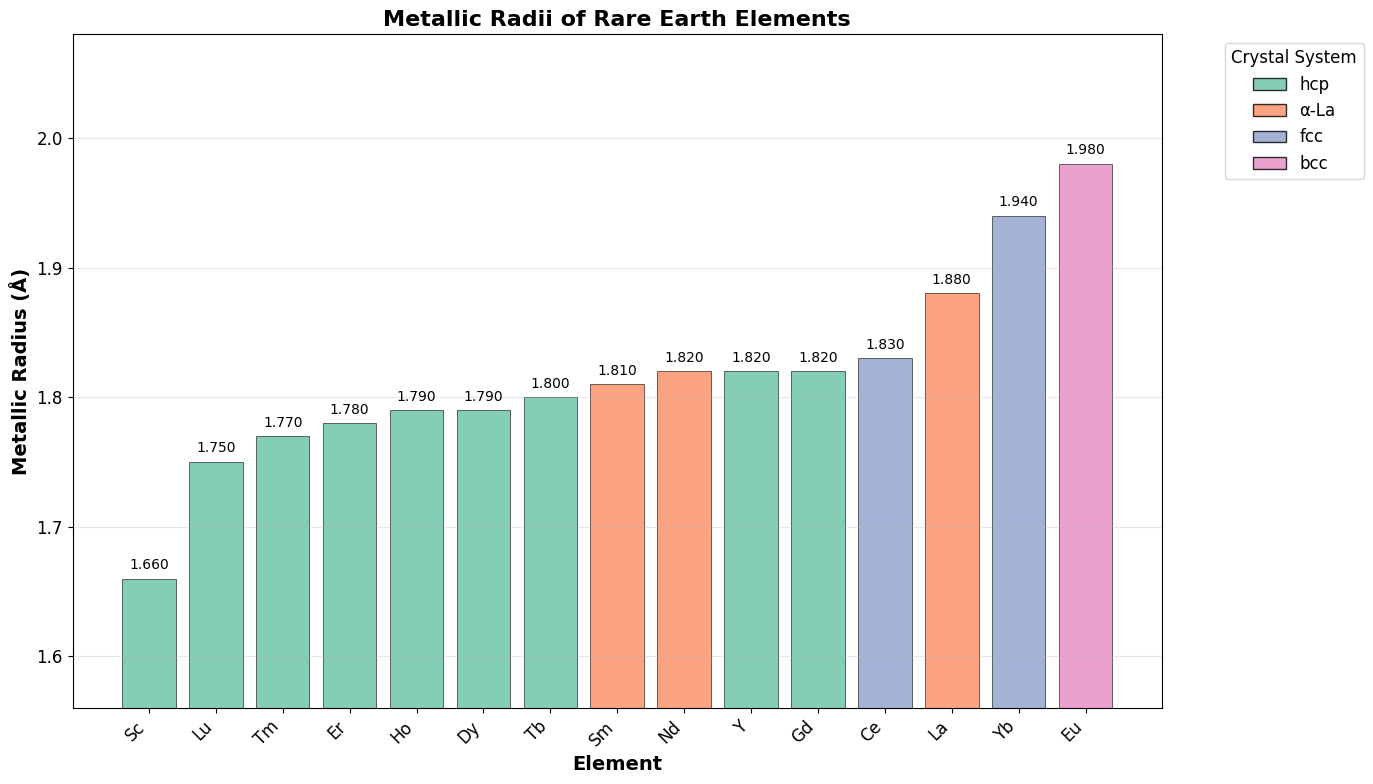

In [63]:
# Interactive plot of metallic radii
fig, ax = plt.subplots(figsize=(14, 8))

df_sorted = df.sort_values('Metallic Radius (Å)', ascending=True)

# Create color map based on crystal system
crystal_systems = df_sorted['Crystal System'].unique()
colors = sns.color_palette("Set2", len(crystal_systems))
color_map = dict(zip(crystal_systems, colors))

bar_colors = [color_map[cs] for cs in df_sorted['Crystal System']]

bars = ax.bar(df_sorted['Element'], df_sorted['Metallic Radius (Å)'], 
             color=bar_colors, alpha=0.8, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Element', fontsize=14, fontweight='bold')
ax.set_ylabel('Metallic Radius (Å)', fontsize=14, fontweight='bold')
ax.set_title('Metallic Radii of Rare Earth Elements', fontsize=16, fontweight='bold')

# Add value labels on bars
for bar, value in zip(bars, df_sorted['Metallic Radius (Å)']):
    if value:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
               f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# Create legend for crystal systems
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color_map[cs], 
                               edgecolor='black', alpha=0.8, label=cs) 
                  for cs in crystal_systems]
ax.legend(handles=legend_elements, title='Crystal System', 
         bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim((df['Metallic Radius (Å)'].min() - 0.1, df['Metallic Radius (Å)'].max() + 0.1))
plt.show()

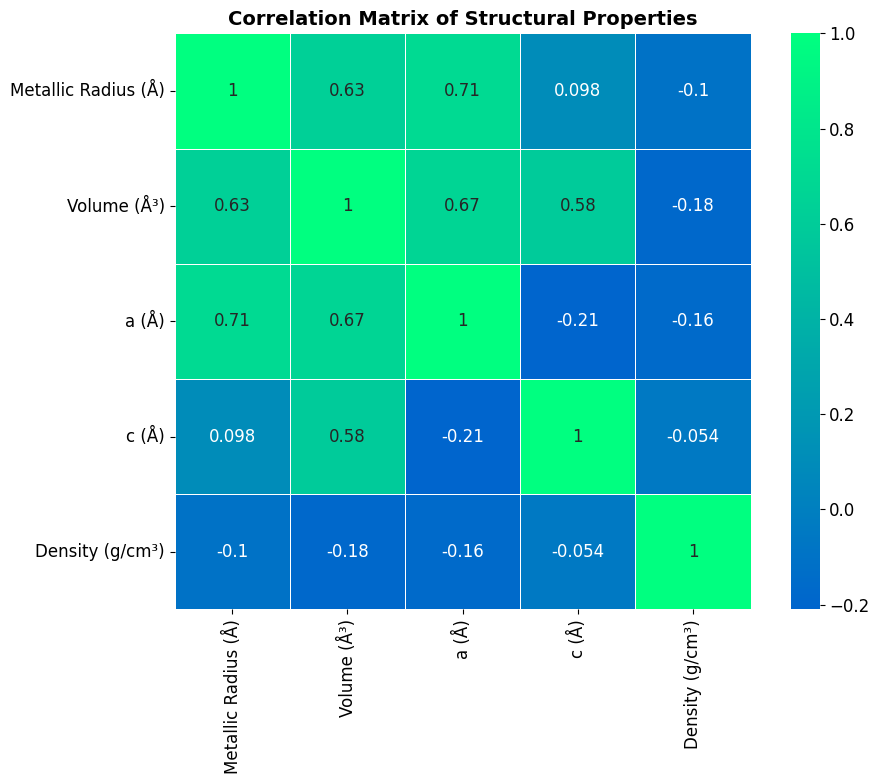

In [62]:
from matplotlib.colors import ListedColormap

# Correlation analysis
numeric_cols = ['Metallic Radius (Å)', 'Volume (Å³)', 'a (Å)', 'c (Å)', 'Density (g/cm³)']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
# Use a custom pastel colormap with several rare colors

pastel_colors = [
    "#f9f7cf",  # light yellow
    "#e2f0cb",  # pale green
    "#caffc8",  # light green
    "#b5ead7",  # mint
    "#b5d8fa",  # baby blue
    "#b0bbe4",  # lavender
    "#f1ffd1",  # pastel lime
    "#fae6c1",  # pale orange
    "#ffd1dc",  # pastel pink
    "#ffa4a4",  # light coral
    "#ffb7b2",  # soft salmon
    "#f7c8e0",  # pastel magenta
    "#e2c2f0",  # pastel purple
    "#c2e0f0",  # pastel blue
    "#c2f0e0",  # pastel aqua
    "#f0e2c2",  # pastel gold
    "#f0c2c2",  # pastel red
]
pastel_cmap = ListedColormap(pastel_colors, N=len(pastel_colors))

sns.heatmap(
    correlation_matrix,
    annot=True,
    # cmap=pastel_cmap,
    cmap='winter',
    center=0,
    square=True,
    linewidths=0.5
)

# Replace underscores with spaces in axis tick labels
# ax = plt.gca()
# ax.set_xticklabels([label.get_text().replace('_', ' ') for label in ax.get_xticklabels()], rotation=45, ha='right')
# ax.set_yticklabels([label.get_text().replace('_', ' ') for label in ax.get_yticklabels()])
plt.title('Correlation Matrix of Structural Properties', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [35]:
# Crystal system analysis
crystal_stats = df.groupby('Crystal System').agg({
    'Metallic Radius (Å)': ['mean', 'std', 'min', 'max'],
    'Volume (Å³)': ['mean', 'std'],
    'Density (g/cm³)': ['mean', 'std']
}).round(3)

print("Statistics by Crystal System:")
crystal_stats

Statistics by Crystal System:


Metallic Radius (Å)                      Volume (Å³)          \
                              mean    std    min    max        mean     std   
Crystal System                                                                
bcc                          1.984    NaN  1.984  1.984      96.220     NaN   
fcc                          1.882  0.081  1.825  1.939     151.235  19.453   
hcp                          1.777  0.052  1.655  1.832      61.504   5.109   
α-La                         1.842  0.040  1.810  1.887     139.800   9.186   

               Density (g/cm³)         
                          mean    std  
Crystal System                         
bcc                      5.240    NaN  
fcc                      6.870  0.141  
hcp                      7.674  2.362  
α-La                     6.897  0.697

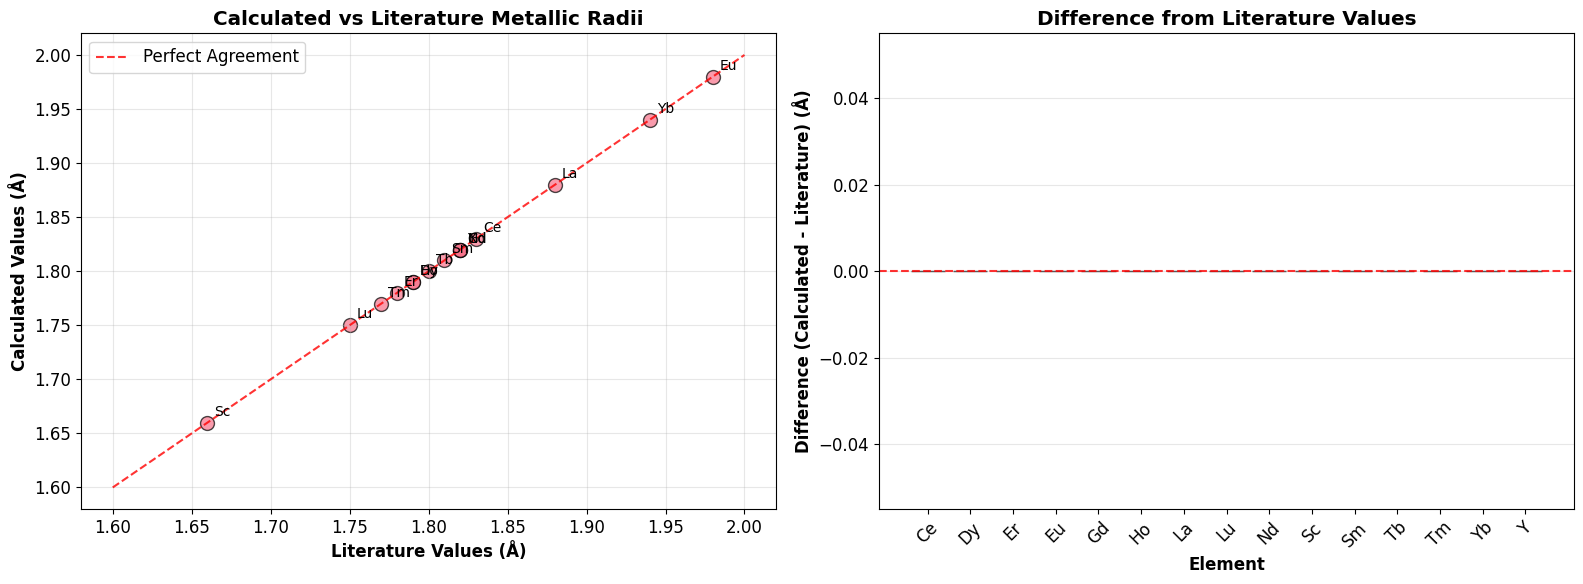


Root Mean Square Error vs Literature: 0.0000 Å
Mean Absolute Error vs Literature: 0.0000 Å


In [36]:
# Create a comparison with literature values (if available)
# This is a placeholder - you can add literature values for comparison
literature_radii = {
    'La': 1.88, 'Ce': 1.83, 'Nd': 1.82, 'Sm': 1.81, 'Eu': 1.98,
    'Gd': 1.82, 'Tb': 1.80, 'Dy': 1.79, 'Ho': 1.79, 'Er': 1.78,
    'Tm': 1.77, 'Yb': 1.94, 'Lu': 1.75, 'Sc': 1.66, 'Y': 1.82
}

# Add literature values to dataframe for comparison
df['Metallic Radius (Å)'] = df['Element'].map(literature_radii)
df['Difference (Å)'] = df['Metallic Radius (Å)'] - df['Metallic Radius (Å)']

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot comparing calculated vs literature values
valid_data = df.dropna(subset=['Metallic Radius (Å)'])
ax1.scatter(valid_data['Metallic Radius (Å)'], valid_data['Metallic Radius (Å)'], 
           s=100, alpha=0.7, edgecolors='black')
ax1.plot([1.6, 2.0], [1.6, 2.0], 'r--', alpha=0.8, label='Perfect Agreement')
ax1.set_xlabel('Literature Values (Å)', fontweight='bold')
ax1.set_ylabel('Calculated Values (Å)', fontweight='bold')
ax1.set_title('Calculated vs Literature Metallic Radii', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add element labels
for _, row in valid_data.iterrows():
    ax1.annotate(row['Element'], 
                (row['Metallic Radius (Å)'], row['Metallic Radius (Å)']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

# Bar plot of differences
ax2.bar(valid_data['Element'], valid_data['Difference (Å)'], 
        color='skyblue', alpha=0.8, edgecolor='black')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.8)
ax2.set_xlabel('Element', fontweight='bold')
ax2.set_ylabel('Difference (Calculated - Literature) (Å)', fontweight='bold')
ax2.set_title('Difference from Literature Values', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate RMSE
rmse = np.sqrt(np.mean(valid_data['Difference (Å)']**2))
print(f"\nRoot Mean Square Error vs Literature: {rmse:.4f} Å")
print(f"Mean Absolute Error vs Literature: {np.mean(np.abs(valid_data['Difference (Å)'])):.4f} Å")